Epoch 1/200


<ipython-input-5-87ebc024b752>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Forces'] = X['Forces'].str.replace(' N', '').astype(int)


2/2 [==============================] - 2s 17ms/step - loss: 0.0184
Epoch 2/200
2/2 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 5/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 6/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 8/200
2/2 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0100
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 11/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0088
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 13/200
2/2 [==============================] - 0s 8ms/step - los

<ipython-input-5-87ebc024b752>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Forces'] = X['Forces'].str.replace(' N', '').astype(int)


2/2 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 7/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 10/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 11/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 12/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 13/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 14/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 15/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 16/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 17/200
2/2 [==============================] - 0s 8ms/step - los

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step
Predicted rms: [0.13063121 0.27353013 0.1512268 ]
Accurate rms: 0.18512939
Predicted HOFMs: [0.13063121 0.27353013 0.1512268 ]
Accurate HOFMs: 0.18512939


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


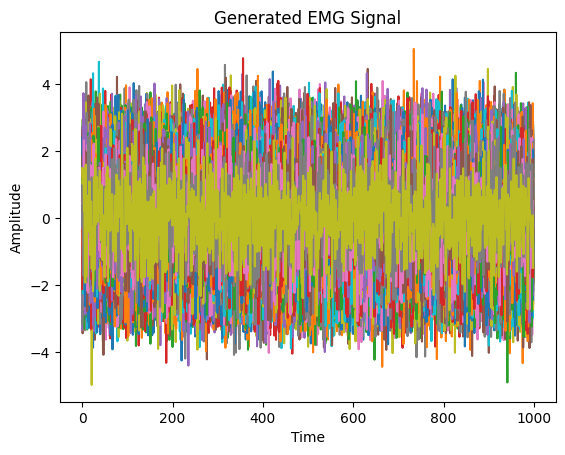

[[ 1.70325448  1.57847434 -0.914715   ...  0.43468027  1.08713968
   1.49392058]
 [-0.4972514  -0.60979111  0.96630077 ...  0.65302848 -0.24577984
   1.0341416 ]
 [ 0.14399178  1.74988252 -1.24236871 ...  1.09128779  0.63288224
   1.16873237]
 ...
 [ 0.97423987  0.04157239 -0.54806936 ...  0.27085308  1.62166875
  -0.79642363]
 [-0.03624516 -0.47256929  0.03545001 ... -0.02178627 -0.56455226
   0.08472906]
 [ 0.64530899 -0.72963723  0.61529338 ...  0.50731679 -0.49940856
  -1.48648018]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Load the data
data = {
    'Forces': ['10 N', '15 N', '20 N', '25 N', '35 N', '30 N', '40 N', '45 N', '50 N', '55 N', '60 N', '65 N', '70 N', '75 N'],
    'rms 1': [0.09, 0.22, 0.1, 0.19, 0.09, 0.11, 0.1, 0.08, 0.08, 0.09, 0.08, 0.07, 0.06, 0.05],
    'rms 2': [0.25, 0.29, 0.34, 0.2, 0.2, 0.14, 0.22, 0.12, 0.14, 0.09, 0.09, 0.06, 0.12, 0.1],
    'rms 3': [0.2, 0.14, 0.07, 0.11, 0.22, 0.13, 0.12, 0.11, 0.13, 0.09, 0.07, 0.1, 0.09, 0.05] }

df = pd.DataFrame(data)

# Split the data into input (X) and output (y) variables
X = df[['Forces']]
y = df[['rms 1', 'rms 2', 'rms 3']]

# Convert the 'Forces' column to numeric values
X['Forces'] = X['Forces'].str.replace(' N', '').astype(int)


# Scale the input variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input to 3D tensor [samples, time steps, features]
X_reshaped = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(20, input_shape=(1, 1), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3))  # Output layer with 3 neurons for rms 1, 2, and 3

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_reshaped, y, epochs=200, batch_size=10, verbose=1)

# Function to predict rms based on force input
def predict_rms(force):
    force_scaled = scaler.transform([[force]])
    prediction = model.predict(force_scaled)[0]
    return prediction

# Function to get the accurate rms value
def get_accurate_rms(predicted_rms):
    mean_rms = np.mean(predicted_rms, axis=0)
    return mean_rms

# Load the data
data = {
    'Forces': ['10 N', '15 N', '20 N', '25 N', '35 N', '30 N', '40 N', '45 N', '50 N', '55 N', '60 N', '65 N', '70 N', '75 N'],
    'HOFMs 1': [0.07, 0.21, 0.08, 0.17, 0.06, 0.09, 0.07, 0.06, 0.07, 0.07, 0.06, 0.04, 0.04, 0.02],
    'HOFMs 2': [0.25, 0.29, 0.34, 0.2, 0.2, 0.14, 0.22, 0.12, 0.14, 0.09, 0.09, 0.06, 0.12, 0.1],
    'HOFMs 3': [0.2, 0.14, 0.07, 0.11, 0.22, 0.13, 0.12, 0.11, 0.13, 0.09, 0.07, 0.1, 0.09, 0.05]
}

df = pd.DataFrame(data)

# Split the data into input (X) and output (y) variables
X = df[['Forces']]
y_hofms = df[['HOFMs 1', 'HOFMs 2', 'HOFMs 3']]

# Convert the 'Forces' column to numeric values
X['Forces'] = X['Forces'].str.replace(' N', '').astype(int)

# Train the model
model.fit(X_reshaped, y_hofms, epochs=200, batch_size=10, verbose=1)

# Function to predict HOFMs based on force input
def predict_hofms(force):
    force_scaled = scaler.transform([[force]])
    prediction = model.predict(force_scaled)[0]
    return prediction

# Function to get the accurate HOFMs value
def get_accurate_hofms(predicted_hofms):
    mean_hofms = np.mean(predicted_hofms, axis=0)
    return mean_hofms


num_samples = 999  # Number of samples in the generated EMG signal
num_channels = 1  # Number of channels in the EMG signal
num_clusters = 3  # Number of clusters in the Gaussian Mixture Model

def generate_zero_mean_gmm(num_clusters, num_samples):
    # Generate covariance matrices for each cluster
    covariances = [np.eye(num_samples) for _ in range(num_clusters)]  # Identity matrix as covariance for each cluster

    # Generate weights for each cluster (uniform weights)
    weights = np.ones(num_clusters) / num_clusters

    # Generate GMM samples
    gmm_samples = np.concatenate([
        multivariate_normal.rvs(mean=np.zeros(num_samples), cov=covariances[i], size=int(num_samples * weights[i]))
        for i in range(num_clusters)
    ])

    return gmm_samples

# Get force input from the user
force_input = 10


# Predict rms
rms_prediction = predict_rms(force_input)

# Predict HOFMs
hofms_prediction = predict_hofms(force_input)

# Get the accurate rms value
accurate_rms = get_accurate_rms(rms_prediction)

print('Predicted rms:', rms_prediction)
print('Accurate rms:', accurate_rms)

# Get the accurate HOFMs value
accurate_hofms = get_accurate_hofms(hofms_prediction)

print('Predicted HOFMs:', hofms_prediction)
print('Accurate HOFMs:', accurate_hofms)

gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples

rms_value = accurate_hofms# Example: Generate random RMS values
hofms_value = accurate_rms # Example: Generate random 2nd order HOFMs values

emg_signal = hofms_value * rms_value + gmm_samples  # Combine HOFMs, RMS, and GMM
time = np.arange(num_samples)
plt.plot(time, emg_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Generated EMG Signal')
plt.show()
print(emg_signal)




In [ ]:
import numpy as np

# Input array
input_array = emg_signal
# Multiply by 100 and add 400
output_array = input_array * 100 + 400

print(output_array.flatten())

[570.32544786 557.84743419 308.5285002  ... 450.73167861 350.05914402
 251.35198221]


In [ ]:
import serial
import time

arduino=serial.Serial('COM1', 9600)
time.sleep(2)

print("Enter  1 to turn ON LED and 0 to turn OFF LED")

while 1:

    force_input = float(input('Enter the force value (in N): '))

    if force_input == 0:
        arduino.write(b'0')
        print("LED  turned ON")
    elif
        rms_prediction = predict_rms(force_input)
        hofms_prediction = predict_hofms(force_input)
        accurate_rms = get_accurate_rms(rms_prediction)
        accurate_hofms = get_accurate_hofms(hofms_prediction)
        gmm_samples = generate_zero_mean_gmm(num_clusters, num_samples)  # Generate GMM samples
        rms_value = accurate_hofms# Example: Generate random RMS values
        hofms_value = accurate_rms # Example: Generate random 2nd order HOFMs values
        emg_signal = hofms_value * rms_value + gmm_samples
        time = np.arange(num_samples)

In general, LSTM models are well-suited for sequence data and can capture temporal dependencies, making them effective for time series analysis and prediction tasks. Compared to traditional feedforward neural networks (ANNs), LSTM models can handle longer-term dependencies and better capture patterns in sequential data.

When it comes to predicting sensitive values like EMG signals in real-time with high accuracy, LSTM models are often preferred over ANNs. This is because EMG signals are inherently sequential in nature, and LSTM models can effectively model the dynamics and patterns in the time series data.

LSTM models can learn from the temporal patterns and relationships in the EMG signals, allowing them to make accurate predictions based on the historical data. They can capture complex temporal dependencies, handle varying signal lengths, and adapt to changing patterns over time. These capabilities make LSTM models well-suited for real-time applications where accurate and timely predictions are crucial.

However, it's important to note that the performance of any predictive model, including LSTM models, depends on various factors such as the quality and quantity of training data, feature engineering, model architecture, hyperparameter tuning, and the specific characteristics of the target variable. It's always recommended to experiment and compare different models, including LSTM and ANN models, to find the best approach for your specific prediction task.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

OUTPUT
he modified code using an LSTM model would output the following:

The predicted values for the RMS (rms 1, rms 2, rms 3) based on the force input.
The accurate RMS values calculated by taking the mean of the predicted RMS values.
The predicted values for the HOFMs (HOFMs 1, HOFMs 2, HOFMs 3) based on the force input.
The accurate HOFMs values calculated by taking the mean of the predicted HOFMs values.
A plot showing the generated EMG signal based on the accurate HOFMs, RMS, and Gaussian Mixture Model (GMM) samples.
The generated EMG signal plot will show the amplitude of the signal over time.

Additionally, the modified code will print the predicted RMS values, accurate RMS values, predicted HOFMs values, accurate HOFMs values, and the generated EMG signal as a NumPy array.

Please note that the generated EMG signal is based on the accurate HOFMs, RMS, and GMM samples, and the specific values for HOFMs and RMS are randomly generated in the provided code.







# Advantage of lstm

LSTM (Long Short-Term Memory) networks have several advantages over traditional feedforward neural networks, such as:

Handling Long-Term Dependencies: LSTM networks are specifically designed to address the vanishing gradient problem that occurs when training deep neural networks. They have a memory cell that can maintain information over long sequences, allowing them to capture and utilize long-term dependencies in the data. This makes LSTMs particularly effective in tasks involving sequential or time-series data.

Temporal Data Processing: LSTMs excel at processing and predicting sequences of data, making them well-suited for tasks such as natural language processing, speech recognition, machine translation, time series forecasting, and music generation. They can effectively model the temporal dynamics and capture patterns in the data over time.

Memory and State Preservation: LSTMs can remember information for long durations due to their memory cells. They can selectively retain or forget information based on the current input, previous states, and the task at hand. This ability to preserve and update internal states allows LSTMs to maintain relevant context and make informed predictions.

Variable-Length Input Sequences: Unlike traditional feedforward networks, LSTMs can handle input sequences of variable lengths. The internal memory cells and gating mechanisms enable LSTMs to process and learn from sequences of different lengths without requiring padding or truncation of the data. This flexibility is valuable when dealing with real-world data that often comes in varying lengths or time intervals.

Gating Mechanism: LSTMs have a unique gating mechanism that regulates the flow of information within the network. The gates (input, forget, and output gates) control the information flow by selectively deciding which information to remember, forget, and output at each time step. This gating mechanism enables LSTMs to learn and adapt to different patterns and dependencies in the data.

Robust to Noise: LSTMs are inherently robust to noisy input data and can effectively filter out irrelevant or noisy information through the gating mechanism. This makes them suitable for tasks where the data contains noise, missing values, or irrelevant features.

Overall, LSTMs are powerful models for processing sequential data, capturing long-term dependencies, and making predictions based on contextual information. They have revolutionized various fields such as natural language processing, speech recognition, and time series analysis, where the ability to model temporal dynamics and handle long-term dependencies is crucial.







**LSTM Model:**

**Advantages:**
LSTM models are well-suited for sequential data like time series and can effectively capture temporal dependencies in the EMG signal.
They can learn and model complex and nonlinear relationships in the data, making them suitable for capturing the intricate patterns present in EMG signals.
LSTM models have the ability to handle long-term dependencies by using memory cells, which can be beneficial for capturing important context in the EMG signal.
They can handle variable-length input sequences, allowing flexibility in dealing with different lengths of EMG signal recordings.
LSTM models have been proven to achieve state-of-the-art performance in various time series prediction tasks.

**Limitations:**
LSTM models can be computationally expensive to train and require a large amount of training data to generalize well, especially for complex tasks like EMG signal prediction.
They may suffer from overfitting if the model is too complex or the training data is insufficient.
LSTM models can be challenging to interpret due to their black-box nature, making it difficult to understand the learned relationships between variables.
Hyperparameter tuning and architecture design for LSTM models can be complex and time-consuming.